In [1]:
import pandas as pd
import calendar
import numpy as np
from datetime import date
import matplotlib.pyplot as plt

In [2]:
wego = pd.read_csv("../data/Route 50 Timepoint and Headway Data, 1-1-2023 through 5-12-2025.csv")

In [3]:
wego_day_of_week = wego.copy()

In [4]:
print(wego_day_of_week.columns)

Index(['CALENDAR_ID', 'SERVICE_ABBR', 'ADHERENCE_ID', 'DATE', 'ROUTE_ABBR',
       'BLOCK_ABBR', 'OPERATOR', 'TRIP_ID', 'OVERLOAD_ID',
       'ROUTE_DIRECTION_NAME', 'TIME_POINT_ABBR', 'ROUTE_STOP_SEQUENCE',
       'TRIP_EDGE', 'LATITUDE', 'LONGITUDE', 'SCHEDULED_TIME',
       'ACTUAL_ARRIVAL_TIME', 'ACTUAL_DEPARTURE_TIME', 'ADHERENCE',
       'SCHEDULED_HDWY', 'ACTUAL_HDWY', 'HDWY_DEV', 'ADJUSTED_EARLY_COUNT',
       'ADJUSTED_LATE_COUNT', 'ADJUSTED_ONTIME_COUNT', 'STOP_CANCELLED',
       'PREV_SCHED_STOP_CANCELLED', 'IS_RELIEF', 'BLOCK_STOP_ORDER',
       'DWELL_IN_MINS'],
      dtype='object')


In [5]:
wego_day_of_week['TIME_OF_DAY_CATEGORY']=pd.cut(wego_day_of_week['SCHEDULED_TIME'],bins=['05:00:00','08:00:00','11:00:00','14:00:00','17:00:00','20:00:00','24:00:00'],include_lowest=True,labels=['EM','MP','MD','AP','EP','LN'])

In [6]:
wego_day_of_week['SCHEDULUED_HOUR'] = wego_day_of_week['SCHEDULED_TIME'].str[:2]

In [7]:
wego_day_of_week['DATE']= pd.to_datetime(wego_day_of_week['DATE'])

In [9]:
wego_day_of_week['DAY_NUM'] = wego_day_of_week['DATE'].dt.weekday

In [10]:
wego_sunday = wego_day_of_week[wego_day_of_week['DAY_NUM']==6]

In [11]:
wego_monday = wego_day_of_week[wego_day_of_week['DAY_NUM']==0]

In [12]:
wego_tuesday = wego_day_of_week[wego_day_of_week['DAY_NUM']==1]

In [13]:
wego_wednesday =  wego_day_of_week[wego_day_of_week['DAY_NUM']==2]

In [14]:
wego_thursday =  wego_day_of_week[wego_day_of_week['DAY_NUM']==3]

In [15]:
wego_friday = wego_day_of_week[wego_day_of_week['DAY_NUM']==4]

In [16]:
wego_saturday = wego_day_of_week[wego_day_of_week['DAY_NUM']==5]

In [17]:
wego_weekdays = wego_day_of_week[wego_day_of_week['DAY_NUM'] < 6]

In [18]:
wego_weekends = wego_day_of_week[wego_day_of_week['DAY_NUM'] > 5]

In [19]:
wego_copy = wego_day_of_week.copy()

In [20]:
wego_adherence = wego_copy[['ADHERENCE']]

In [21]:
adherence_late = wego_adherence[wego_adherence['ADHERENCE']< -6]

In [22]:
adherence_early = wego_adherence[wego_adherence['ADHERENCE']> 1]

In [23]:
tsp_one_chunk = wego_day_of_week[wego_day_of_week['DATE'].between('2025/2/4','2025/2/9')]
tsp_one_first_day=wego_day_of_week[wego_day_of_week['DATE']=='2025/2/3']
tsp_one_time = tsp_one_first_day[tsp_one_first_day['ACTUAL_ARRIVAL_TIME']>'12:00:00']
tsp_one_last_day=wego_day_of_week[wego_day_of_week['DATE']=='2025/2/10']
tsp_last_time = tsp_one_last_day[tsp_one_last_day['ACTUAL_ARRIVAL_TIME']<'12:00:00']
tsp_one_complete = pd.concat([tsp_one_first_day, tsp_one_chunk,tsp_one_last_day])

In [24]:
tscpb_chunk = wego_day_of_week[wego_day_of_week['DATE'].between('2025/2/11','2025/4/27')]
tscpb_first_day=wego_day_of_week[wego_day_of_week['DATE']=='2025/2/10']
tscpb_first_time = tscpb_first_day[tscpb_first_day['ACTUAL_ARRIVAL_TIME']>'12:00:00']
tscpb_last_day=wego_day_of_week[wego_day_of_week['DATE']=='2025/4/28']
tscpb_last_time = tscpb_last_day[tscpb_last_day['ACTUAL_ARRIVAL_TIME']<'12:00:00']
tscpb_complete = pd.concat([tscpb_first_time, tscpb_chunk, tscpb_last_time])

In [25]:
tsp_off_chunk = wego_day_of_week[wego_day_of_week['DATE'].between('2025/4/29','2025/5/4')]
tsp_off_first_day = wego_day_of_week[wego_day_of_week['DATE']=='2025/4/28']
tsp_off_first_time = tsp_off_first_day[tsp_off_first_day['ACTUAL_ARRIVAL_TIME']>'12:00:00']
tsp_off_last_day = wego_day_of_week[wego_day_of_week['DATE']=='2025/5/5']
tsp_off_last_time = tsp_off_last_day[tsp_off_last_day['ACTUAL_ARRIVAL_TIME']<'12:00:00']
tsp_off_complete = pd.concat([tsp_off_first_time,tsp_off_chunk,tsp_off_last_time])

In [26]:
tsp_two_chunk = wego_day_of_week[wego_day_of_week['DATE'].between('2025/5/6','2025/5/11')]
tsp_two_first_day = wego_day_of_week[wego_day_of_week['DATE']=='2025/5/5']
tsp_two_first_time = tsp_two_first_day[tsp_two_first_day['ACTUAL_ARRIVAL_TIME']>'12:00:00']
tsp_two_last_day = wego_day_of_week[wego_day_of_week['DATE']=='2025/5/12']
tsp_two_last_time = tsp_two_last_day[tsp_two_last_day['ACTUAL_ARRIVAL_TIME']<'12:00:00']
tsp_two_complete = pd.concat ([tsp_two_first_time, tsp_two_chunk, tsp_two_last_time])

In [30]:
tsphc_chunk = wego_day_of_week[wego_day_of_week['DATE']>('2025/5/12')]
tsphc_first_day = wego_day_of_week[wego_day_of_week['DATE']=='2025/5/12']
tsphc_first_time = tsphc_first_day[tsphc_first_day['ACTUAL_ARRIVAL_TIME']>'12:00:00']
tsphc_complete = pd.concat ([tsphc_first_time, tsphc_chunk])

In [31]:
wego_drivers = wego_copy[['OPERATOR','DATE']]

In [33]:
wego_drivers_count = wego_drivers['OPERATOR'].nunique()

In [36]:
driver_stop_count = wego_drivers.groupby(('OPERATOR'), as_index=False).count()

In [40]:
driver_stop_count

,OPERATOR,DATE
0,0,17
1,201,30
2,250,24
3,304,21485
4,327,12
...,...,...
468,3511,132
469,3512,186
470,3519,29
471,3521,30


In [45]:
driver_stop_count['DATE'].mean()

1308.6638477801268

In [47]:
top_half_drivers = driver_stop_count[driver_stop_count['DATE']>1308]

In [50]:
bottom_half_drivers = driver_stop_count[driver_stop_count['DATE']<1308]

In [55]:
top_half_driver_ids = top_half_drivers['OPERATOR'].tolist()

In [60]:
bottom_half_driver_ids = bottom_half_drivers['OPERATOR'].tolist()

In [61]:
wego_trip_id_operators = wego_day_of_week[['OPERATOR', 'TRIP_ID']]
driver_trip_count = wego_trip_id_operators.groupby('OPERATOR')['TRIP_ID'].nunique().reset_index()
driver_trip_count.columns = ['OPERATOR','TRIPS']
driver_trip_count_sorted = driver_trip_count.sort_values(by='TRIPS')
driver_trip_count_mean = driver_trip_count['TRIPS'].mean()
experienced_drivers = driver_trip_count[driver_trip_count['TRIPS']>65]
inexperienced_drivers = driver_trip_count[driver_trip_count['TRIPS']<65]
experienced_driver_list = experienced_drivers['OPERATOR'].tolist()
inexperienced_driver_list = inexperienced_drivers['OPERATOR'].tolist()

In [62]:
top_tscpb = tscpb_complete[tscpb_complete['OPERATOR'].isin(experienced_driver_list)]

In [63]:
bottom_tscpb = tscpb_complete[tscpb_complete['OPERATOR'].isin(inexperienced_driver_list)]

In [66]:
top_tsp_off = tsp_off_complete[tsp_off_complete['OPERATOR'].isin(experienced_driver_list)]

In [68]:
bottom_tsp_off = tsp_off_complete[tsp_off_complete['OPERATOR'].isin(inexperienced_driver_list)]

In [69]:
top_tsp_one = tsp_one_complete[tsp_one_complete['OPERATOR'].isin(experienced_driver_list)]

In [71]:
bottom_tsp_one = tsp_one_complete[tsp_one_complete['OPERATOR'].isin(inexperienced_driver_list)]

In [72]:
top_tsp_two = tsp_two_complete[tsp_two_complete['OPERATOR'].isin(experienced_driver_list)]

In [73]:
bottom_tsp_two = tsp_two_complete[tsp_two_complete['OPERATOR'].isin(inexperienced_driver_list)]

In [75]:
top_tsphc = tsphc_complete[tsphc_complete['OPERATOR'].isin(experienced_driver_list)]

In [76]:
bottom_tsphc = tsphc_complete[tsphc_complete['OPERATOR'].isin(inexperienced_driver_list)]

In [78]:
top_tsp_off_adherence = top_tsp_off['ADHERENCE'].mean()
bottom_tsp_off_adherence = bottom_tsp_off['ADHERENCE'].mean()

In [80]:
top_tscpb_adherence = top_tscpb['ADHERENCE'].mean()
bottom_tscpb_adherence = bottom_tscpb['ADHERENCE'].mean()

In [82]:
top_tsp_one_adherence = top_tsp_one['ADHERENCE'].mean()
bottom_tsp_one_adherence = bottom_tsp_one['ADHERENCE'].mean()

In [83]:
top_tsp_two_adherence = top_tsp_two['ADHERENCE'].mean()
bottom_tsp_two_adherence = bottom_tsp_two['ADHERENCE'].mean()

In [85]:
top_tsphc_adherence = top_tsphc['ADHERENCE'].mean()
bottom_tsphc_adherence = bottom_tsphc['ADHERENCE'].mean()

In [86]:
print(top_tsp_off_adherence, 'top off')
print(bottom_tsp_off_adherence, 'bottom off')
print(top_tscpb_adherence, 'top priority on')
print(bottom_tscpb_adherence, 'bottom priority on')
print(top_tsp_one_adherence, 'top on trial 1')
print(bottom_tsp_one_adherence, 'bottom on trial 1')
print(top_tsp_two_adherence, 'top on trial 2')
print(bottom_tsp_two_adherence, 'bottom on trial 2')
print(top_tsphc_adherence, 'top on final')
print(bottom_tsphc_adherence, 'bottom on final')

-2.886129364314248 top off
-3.4073392035029193 bottom off
-2.2572179455560026 top priority on
-2.821858932569584 bottom priority on
-0.27631757323293654 top on trial 1
-0.12947554724880397 bottom on trial 1
-2.8194717008003765 top on trial 2
-2.915137049411765 bottom on trial 2
-1.8413873708133972 top on final
-1.8722219545454544 bottom on final


In [90]:
wego_monday_adherence = wego_monday['ADHERENCE'].mean()

In [92]:
wego_tuesday_adherence = wego_tuesday['ADHERENCE'].mean()

In [96]:
wego_wednesday_adherence = wego_wednesday['ADHERENCE'].mean()

In [100]:
wego_thursday_adherence = wego_thursday['ADHERENCE'].mean()

In [103]:
wego_friday_adherence = wego_friday['ADHERENCE'].mean()

In [106]:
wego_saturday_adherence = wego_saturday['ADHERENCE'].mean()

In [109]:
wego_sunday_adherence = wego_sunday['ADHERENCE'].mean()

In [112]:
print(wego_monday_adherence)
print(wego_tuesday_adherence)
print(wego_wednesday_adherence)
print(wego_thursday_adherence)
print(wego_friday_adherence)
print(wego_saturday_adherence)
print(wego_sunday_adherence)

-2.330962455072432
-2.6637147088153594
-2.666189200916592
-2.5750338246646076
-2.661883506055409
-2.7124328242771685
-1.5915072928118903


In [113]:
tscpb_headway_mean = tscpb_complete['HDWY_DEV'].mean()

In [116]:
tscpb_scheduled_headway_mean = tscpb_complete['SCHEDULED_HDWY'].mean()

In [117]:
tscpb_headway_deviation_percentage = (tscpb_headway_mean/tscpb_scheduled_headway_mean) * 100

In [119]:
print(tscpb_headway_deviation_percentage)

4.828999946623068


In [121]:
tsp_one_headway_mean = tsp_one_complete['HDWY_DEV'].mean()

In [123]:
tsp_one_scheduled_headway_mean = tsp_one_complete['SCHEDULED_HDWY'].mean()

In [125]:
tsp_one_deviation_percentage = (tsp_one_headway_mean/tsp_one_scheduled_headway_mean) * 100

In [127]:
print(tsp_one_deviation_percentage)

1.6514259085959742


In [130]:
tsp_two_headway_mean = tsp_two_complete['HDWY_DEV'].mean()

In [133]:
tsp_two_scheduled_headway_mean = tsp_two_complete['SCHEDULED_HDWY'].mean()

In [136]:
tsp_two_deviation_percentage = (tsp_two_headway_mean / tsp_two_scheduled_headway_mean) * 100

In [139]:
print(tsp_two_deviation_percentage)

0.3709505558768034


In [141]:
tsp_off_headway_time_means = tsp_off_complete.groupby('TIME_OF_DAY_CATEGORY', observed=False) ['HDWY_DEV'].mean()

In [143]:
print(tsp_off_headway_time_means)

TIME_OF_DAY_CATEGORY
EM    0.432441
MP    0.125451
MD    0.392891
AP    0.565516
EP    0.413240
LN    0.150124
Name: HDWY_DEV, dtype: float64


In [145]:
tsp_off_scheduled_headway_means = tsp_off_complete.groupby('TIME_OF_DAY_CATEGORY', observed=False) ['SCHEDULED_HDWY'].mean()

In [147]:
tsp_off_deviation_percentage = (tsp_off_headway_time_means/tsp_off_scheduled_headway_means) * 100

In [149]:
print(tsp_off_deviation_percentage)

TIME_OF_DAY_CATEGORY
EM    2.128532
MP    0.730966
MD    2.429193
AP    3.537296
EP    1.856492
LN    0.501698
dtype: float64


In [152]:
wego_time_buckets = wego_day_of_week.copy()

In [159]:
print(wego_time_buckets[['SCHEDULED_TIME','TIME_OF_DAY_CATEGORY']])

       SCHEDULED_TIME TIME_OF_DAY_CATEGORY
0            05:34:00                   EM
1            05:40:00                   EM
2            05:47:00                   EM
3            05:50:00                   EM
4            05:54:00                   EM
...               ...                  ...
618993       07:40:00                   EM
618994       15:05:00                   AP
618995       15:18:00                   AP
618996       15:20:00                   AP
618997       15:37:00                   AP

[618998 rows x 2 columns]


In [160]:
adherence_time_top = top_tscpb.groupby('TIME_OF_DAY_CATEGORY', observed=False) [ 'ADHERENCE'].mean()

In [161]:
print(adherence_time_top)

TIME_OF_DAY_CATEGORY
EM   -1.545483
MP   -2.215785
MD   -2.514510
AP   -3.431066
EP   -2.437279
LN   -1.481040
Name: ADHERENCE, dtype: float64


In [162]:
adherence_time_top_off = top_tsp_off.groupby('TIME_OF_DAY_CATEGORY', observed=False) [ 'ADHERENCE'].mean()

In [167]:
print(adherence_time_top_off)

TIME_OF_DAY_CATEGORY
EM   -1.766927
MP   -2.527655
MD   -3.174612
AP   -4.744923
EP   -2.914845
LN   -2.491884
Name: ADHERENCE, dtype: float64


In [168]:
combined_adherence = pd.concat([adherence_time_top, adherence_time_top_off], axis=1)

In [171]:
combined_adherence.columns= ['TPS_ON', 'TPS_OFF']

In [172]:
print(combined_adherence)

                        TPS_ON   TPS_OFF
TIME_OF_DAY_CATEGORY                    
EM                   -1.545483 -1.766927
MP                   -2.215785 -2.527655
MD                   -2.514510 -3.174612
AP                   -3.431066 -4.744923
EP                   -2.437279 -2.914845
LN                   -1.481040 -2.491884


In [248]:
list_adherence_time_top = combined_adherence['TPS_ON'].tolist()

In [250]:
list_adherence_time_top_off = combined_adherence['TPS_OFF'].tolist()

In [252]:
adherence_time_bottom = bottom_tscpb.groupby('TIME_OF_DAY_CATEGORY', observed=False) [ 'ADHERENCE'].mean()
adherence_time_bottom_off = bottom_tsp_off.groupby('TIME_OF_DAY_CATEGORY', observed=False) [ 'ADHERENCE'].mean()

In [254]:
print(adherence_time_bottom)
print(adherence_time_bottom_off)

TIME_OF_DAY_CATEGORY
EM   -1.307286
MP   -3.084948
MD   -3.568004
AP   -3.302676
EP   -2.581657
LN   -1.403752
Name: ADHERENCE, dtype: float64
TIME_OF_DAY_CATEGORY
EM   -1.196097
MP   -3.496115
MD   -3.849872
AP   -4.566279
EP   -2.693846
LN   -2.219725
Name: ADHERENCE, dtype: float64


In [312]:
combined_adherence_bottom = pd.concat([adherence_time_bottom, adherence_time_bottom_off], axis=1)
combined_adherence_bottom.columns=['TPS_ON', 'TPS_OFF']
list_adherence_time_bottom = combined_adherence_bottom['TPS_ON'].tolist()
list_adherence_time_bottom_off = combined_adherence_bottom['TPS_OFF'].tolist()

In [256]:
headwaydev_time_top = top_tscpb.groupby('TIME_OF_DAY_CATEGORY', observed=False) [ 'HDWY_DEV'].mean()
scheduledheadwaydev_time_top = top_tscpb.groupby('TIME_OF_DAY_CATEGORY', observed=False) [ 'SCHEDULED_HDWY'].mean()
headwaydev_time_top_off = top_tsp_off.groupby('TIME_OF_DAY_CATEGORY', observed=False) [ 'HDWY_DEV'].mean()
scheduluedheadwaydev_time_top_off = top_tsp_off.groupby('TIME_OF_DAY_CATEGORY', observed=False) [ 'SCHEDULED_HDWY'].mean()

In [258]:
print(headwaydev_time_top)
print(headwaydev_time_top_off)

TIME_OF_DAY_CATEGORY
EM    0.831770
MP    0.383368
MD    0.776275
AP    1.468636
EP    0.991294
LN    1.151695
Name: HDWY_DEV, dtype: float64
TIME_OF_DAY_CATEGORY
EM    0.205256
MP   -0.062890
MD    0.450240
AP    1.219561
EP    0.703316
LN   -0.055456
Name: HDWY_DEV, dtype: float64


In [260]:
print(scheduledheadwaydev_time_top)
print(scheduluedheadwaydev_time_top_off)

TIME_OF_DAY_CATEGORY
EM    19.893010
MP    17.023802
MD    15.813679
AP    16.227262
EP    22.816317
LN    29.916290
Name: SCHEDULED_HDWY, dtype: float64
TIME_OF_DAY_CATEGORY
EM    19.334177
MP    16.732787
MD    15.607752
AP    15.300505
EP    22.411184
LN    29.909292
Name: SCHEDULED_HDWY, dtype: float64


In [262]:
print(headwaydev_time_top/scheduledheadwaydev_time_top)
print(headwaydev_time_top_off/scheduluedheadwaydev_time_top_off)

TIME_OF_DAY_CATEGORY
EM    0.041812
MP    0.022520
MD    0.049089
AP    0.090504
EP    0.043447
LN    0.038497
dtype: float64
TIME_OF_DAY_CATEGORY
EM    0.010616
MP   -0.003759
MD    0.028847
AP    0.079707
EP    0.031382
LN   -0.001854
dtype: float64


In [264]:
headwaydev_time_bottom = bottom_tscpb.groupby('TIME_OF_DAY_CATEGORY', observed=False) [ 'HDWY_DEV'].count()
scheduledheadwaydev_time_bottom = bottom_tscpb.groupby('TIME_OF_DAY_CATEGORY', observed=False) [ 'SCHEDULED_HDWY'].count()
headwaydev_time_bottom_off = top_tsp_off.groupby('TIME_OF_DAY_CATEGORY', observed=False) [ 'HDWY_DEV'].count()
scheduluedheadwaydev_time_top_off = top_tsp_off.groupby('TIME_OF_DAY_CATEGORY', observed=False) [ 'SCHEDULED_HDWY'].count()

In [266]:
print(headwaydev_time_bottom/scheduledheadwaydev_time_bottom)
print(headwaydev_time_bottom_off/scheduluedheadwaydev_time_top_off)

TIME_OF_DAY_CATEGORY
EM    0.921885
MP    0.946642
MD    0.951261
AP    0.923496
EP    0.929344
LN    0.939535
dtype: float64
TIME_OF_DAY_CATEGORY
EM    0.987342
MP    0.998361
MD    0.965891
AP    0.959596
EP    0.975329
LN    0.986726
dtype: float64


In [268]:
to_downtown = wego_day_of_week[wego_day_of_week['ROUTE_DIRECTION_NAME']=='TO DOWNTOWN']

In [270]:
from_downtown = wego_day_of_week[wego_day_of_week['ROUTE_DIRECTION_NAME']=='FROM DOWNTOWN']

In [272]:
top_total = wego_day_of_week[wego_day_of_week['OPERATOR'].isin(top_half_driver_ids)]

In [274]:
bottom_total = wego_day_of_week[wego_day_of_week['OPERATOR'].isin(bottom_half_driver_ids)]

In [276]:
adherence_top = top_total.groupby('TIME_OF_DAY_CATEGORY', observed=False) [ 'ADHERENCE'].mean()

In [278]:
adherence_bottom = bottom_total.groupby('TIME_OF_DAY_CATEGORY', observed=False) [ 'ADHERENCE'].mean()

In [280]:
print(adherence_top)
print(adherence_bottom)

TIME_OF_DAY_CATEGORY
EM   -1.522237
MP   -2.015654
MD   -2.744973
AP   -3.542150
EP   -2.822427
LN   -1.816927
Name: ADHERENCE, dtype: float64
TIME_OF_DAY_CATEGORY
EM   -1.414484
MP   -2.160426
MD   -2.995577
AP   -3.379134
EP   -2.944483
LN   -2.114110
Name: ADHERENCE, dtype: float64


In [282]:
wego_day_of_week

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,...,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,BLOCK_STOP_ORDER,DWELL_IN_MINS,TIME_OF_DAY_CATEGORY,SCHEDULUED_HOUR,DAY_NUM
0,120230101,3,93549161,2023-01-01,50,5000,2355,332422,0,TO DOWNTOWN,...,0,1,0,0.0,0,2,8.133333,EM,05,6
1,120230101,3,93549162,2023-01-01,50,5000,2355,332422,0,TO DOWNTOWN,...,0,1,0,0.0,0,5,0.000000,EM,05,6
2,120230101,3,93549163,2023-01-01,50,5000,2355,332422,0,TO DOWNTOWN,...,0,1,0,0.0,0,11,0.000000,EM,05,6
3,120230101,3,93549164,2023-01-01,50,5000,2355,332422,0,TO DOWNTOWN,...,0,1,0,0.0,0,13,0.000000,EM,05,6
4,120230101,3,93549165,2023-01-01,50,5000,2355,332422,0,TO DOWNTOWN,...,0,1,0,0.0,0,18,2.150000,EM,05,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
618993,120250512,1,119531049,2025-05-12,50,8401,3077,432121,0,FROM DOWNTOWN,...,0,0,0,NaN,0,23,4.500000,EM,07,0
618994,120250512,1,119531638,2025-05-12,50,9302,3246,432353,0,TO DOWNTOWN,...,0,1,0,0.0,0,2,27.283333,AP,15,0
618995,120250512,1,119531639,2025-05-12,50,9302,3246,432353,0,TO DOWNTOWN,...,0,1,0,NaN,0,3,0.133333,AP,15,0
618996,120250512,1,119531770,2025-05-12,50,9950,2448,432387,0,TO DOWNTOWN,...,0,1,0,0.0,0,2,8.166666,AP,15,0


In [284]:
dict_adherence=[]

def average_adherence(dataframe):
    mean_adherence=dataframe['ADHERENCE'].mean()
    dict_adherence.append(mean_adherence)
    dataframe['AVG_ADHERENCE']=mean_adherence
    print(mean_adherence)

In [286]:
dataframe_list = [tsp_one_complete, tscpb_complete, tsp_off_complete, tsp_two_complete, tsphc_complete]

In [288]:
for dataframe in dataframe_list:
    average_adherence(dataframe)

-0.23356632084268683
-2.407052192367161
-3.0032939083482764
-2.835422180659082
-1.8455920867768598


In [290]:
dict_adherence

[-0.23356632084268683,
 -2.407052192367161,
 -3.0032939083482764,
 -2.835422180659082,
 -1.8455920867768598]

In [292]:
tsp_one_complete

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,...,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,BLOCK_STOP_ORDER,DWELL_IN_MINS,TIME_OF_DAY_CATEGORY,SCHEDULUED_HOUR,DAY_NUM,AVG_ADHERENCE
546973,120250203,1,117339007,2025-02-03,50,318,3443,417223,0,TO DOWNTOWN,...,1,0,0.0,0,2,35.766666,AP,15,0,-0.233566
546974,120250203,1,117339008,2025-02-03,50,318,3443,417223,0,TO DOWNTOWN,...,0,0,NaN,0,3,0.000000,AP,15,0,-0.233566
546975,120250203,1,117339821,2025-02-03,50,5000,329,417725,0,TO DOWNTOWN,...,0,0,0.0,0,2,7.550000,NaN,04,0,-0.233566
546976,120250203,1,117339822,2025-02-03,50,5000,329,417725,0,TO DOWNTOWN,...,1,0,0.0,0,5,0.000000,NaN,04,0,-0.233566
546977,120250203,1,117339823,2025-02-03,50,5000,329,417725,0,TO DOWNTOWN,...,1,0,0.0,0,11,0.000000,NaN,04,0,-0.233566
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
552906,120250210,1,117588646,2025-02-10,50,8401,3077,420453,0,FROM DOWNTOWN,...,0,0,NaN,0,23,5.916666,EM,07,0,-0.233566
552907,120250210,1,117589227,2025-02-10,50,9302,3246,420590,0,TO DOWNTOWN,...,1,0,0.0,0,2,56.550000,AP,15,0,-0.233566
552908,120250210,1,117589228,2025-02-10,50,9302,3246,420590,0,TO DOWNTOWN,...,0,0,NaN,0,3,2.200000,AP,15,0,-0.233566
552909,120250210,1,117589359,2025-02-10,50,9950,2254,420621,0,TO DOWNTOWN,...,1,0,0.0,0,2,24.883333,AP,15,0,-0.233566


In [294]:
time_buckets = ("EM", "MP", "MD", "AP", "EP", "LN")

In [296]:
rounded_list_adherence_time_top = [round(num, 2) for num in list_adherence_time_top]

In [298]:
rounded_list_adherence_time_top_off = [round(num, 2) for num in list_adherence_time_top_off]

In [314]:
rounded_list_adherence_time_bottom = [round(num, 2) for num in list_adherence_time_bottom]

In [316]:
rounded_list_adherence_time_bottom_off = [round(num, 2) for num in list_adherence_time_bottom_off]

In [318]:
print(rounded_list_adherence_time_top)
print(rounded_list_adherence_time_top_off)

[-1.55, -2.22, -2.51, -3.43, -2.44, -1.48]
[-1.77, -2.53, -3.17, -4.74, -2.91, -2.49]


In [320]:
adherence_dict = {
    # 'TSP ON' : (-1.56, -2.32, -2.56, -3.51, -2.47, -1.51),
    'TSP ON' : (rounded_list_adherence_time_top),
    'TSP OFF' : (rounded_list_adherence_time_top_off),
}

In [322]:
adherence_bottom_dict = {
    'TSP ON' : (rounded_list_adherence_time_bottom),
    'TSP OFF' : (rounded_list_adherence_time_bottom_off),
}

C:\Users\17033\AppData\Local\Temp\ipykernel_54092\1920458262.py:21: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(loc='lower left', ncols=3)


<function matplotlib.pyplot.show(close=None, block=None)>

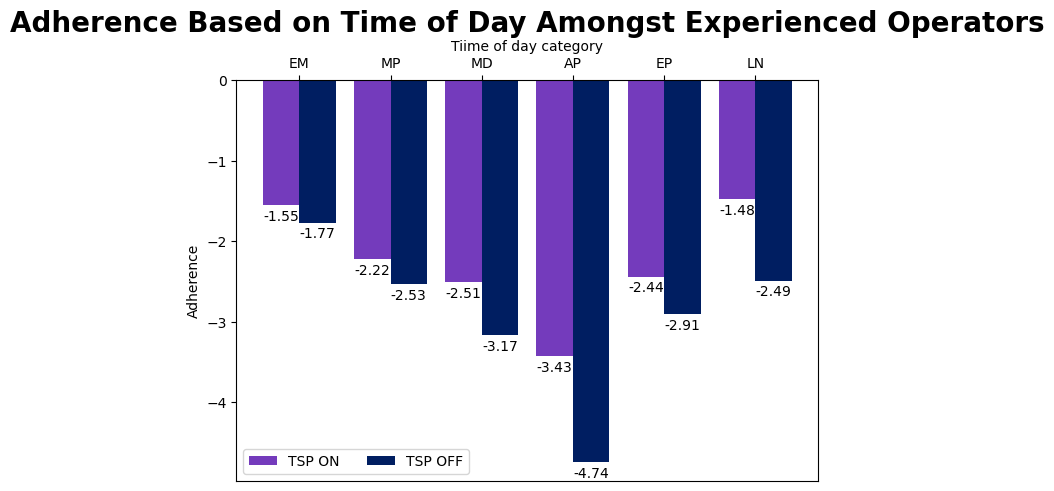

In [338]:
x = np.arange(len(time_buckets))
width = 0.40
multiplier = 0
colors = {'TSP ON' : '#743BBC', 
          'TSP OFF' : '#001E61'}
fig, ax = plt.subplots(layout='constrained')

# plot data in grouped manner of bar type
# bars1 = plt.bar(x-0.2, rounded_list_adherence_time_top, width, label='TSP ON')
# bars2 = plt.bar(x+0.2, rounded_list_adherence_time_top_off, width, label='TSP OFF')

ax.set_ylabel ('Adherence')
ax.set_xlabel ('Tiime of day category')
ax.xaxis.set_ticks_position('top')
ax.xaxis.set_label_position('top')
ax.set_title ('Adherence Based on Time of Day Amongst Experienced Operators', 
              fontweight='bold',
              fontsize=20,)

ax.set_xticks(x + width/2, time_buckets)
ax.legend(loc='lower left', ncols=3)

for attribute, measurement in adherence_dict.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute, color=colors[attribute])
    ax.bar_label(rects, padding=3)
    multiplier +=1

ax.legend(loc='lower left', ncols=3)
plt.savefig('adherence_experienced_operators_SUBMIT.png', bbox_inches='tight')
plt.show

C:\Users\17033\AppData\Local\Temp\ipykernel_54092\1966004708.py:21: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(loc='lower left', ncols=3)


<function matplotlib.pyplot.show(close=None, block=None)>

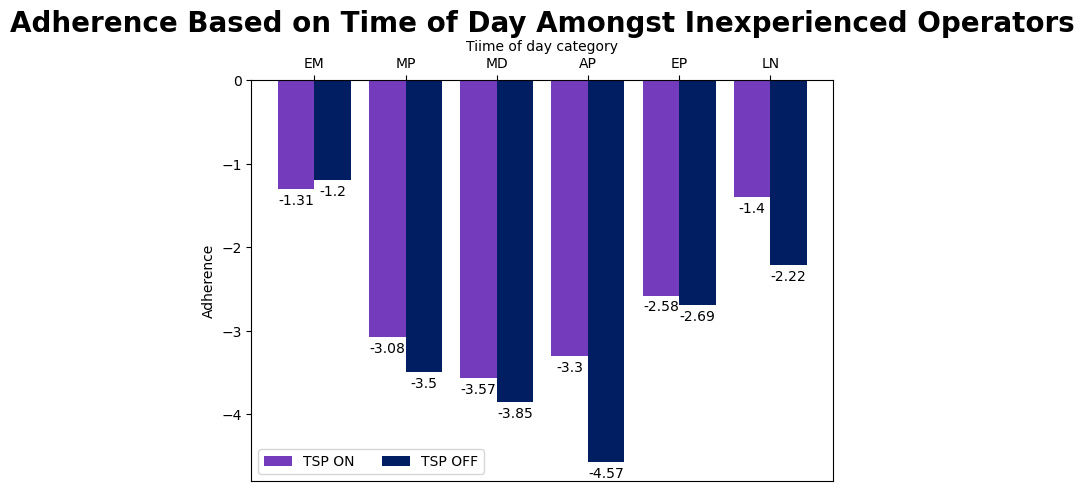

In [336]:
x = np.arange(len(time_buckets))
width = 0.40
multiplier = 0
colors = {'TSP ON' : '#743BBC', 
          'TSP OFF' : '#001E61'}
fig, ax = plt.subplots(layout='constrained')

# plot data in grouped manner of bar type
# bars1 = plt.bar(x-0.2, rounded_list_adherence_time_top, width, label='TSP ON')
# bars2 = plt.bar(x+0.2, rounded_list_adherence_time_top_off, width, label='TSP OFF')

ax.set_ylabel ('Adherence')
ax.set_xlabel ('Tiime of day category')
ax.xaxis.set_ticks_position('top')
ax.xaxis.set_label_position('top')
ax.set_title ('Adherence Based on Time of Day Amongst Inexperienced Operators', 
              fontweight='bold',
              fontsize=20,)

ax.set_xticks(x + width/2, time_buckets)
ax.legend(loc='lower left', ncols=3)

for attribute, measurement in adherence_bottom_dict.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute, color=colors[attribute])
    ax.bar_label(rects, padding=3)
    multiplier +=1

ax.legend(loc='lower left', ncols=3)
plt.savefig('adherence_inexperienced_ops_SUBMIT', bbox_inches='tight')
plt.show

In [328]:
adherence_dict = {
    # 'TSP ON' : (-1.56, -2.32, -2.56, -3.51, -2.47, -1.51),
    'TSP ON' : (rounded_list_adherence_time_top),
    'TSP OFF' : (rounded_list_adherence_time_top_off),
}

In [ ]:
wego_operator_highest = wego_day_of_week[wego_day_of_week['OPERATOR'] == 304]

In [ ]:
wego_operator_highest